In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
176,177,Male,58,88,15
114,115,Female,18,65,48
125,126,Female,31,70,77
195,196,Female,35,120,79
95,96,Male,24,60,52
60,61,Male,70,46,56
130,131,Male,47,71,9
99,100,Male,20,61,49
54,55,Female,50,43,45
109,110,Male,66,63,48


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


DataScaling is not required as the annual income and spending score is the same scale.

In [8]:
X = data.iloc[:, [3, 4]].values
y = data.iloc[:, -1].values

# Usage of elbow method to find the optimal number of customers.

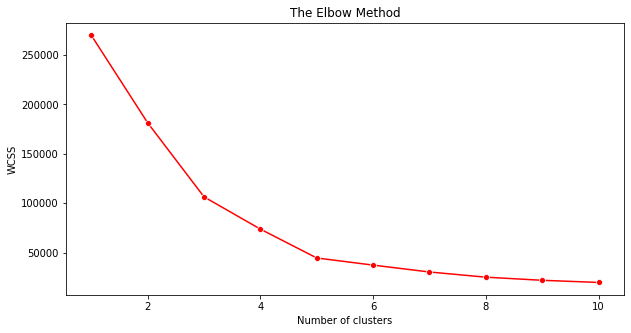

In [9]:
wcss = [] # intializing the list for the values of WCSS (Within-Cluster Sum of Square)
K = range(1, 11) # initializing the loop value from 1 to 10

for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
# plt.plot(range(1, 11), wcss)
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As the steepness is low 5, then 5 is the good cluster to consider.

## Training the KMeans model on the dataset.

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

Visualizing the clusters

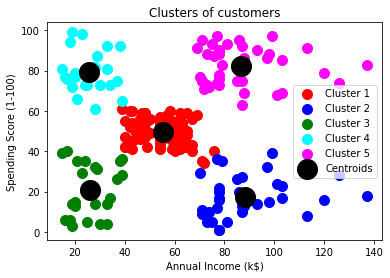

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
# dataframe with the Income, Spending score, Cluster and customer ID column indexed from 1 to 200.

arr1 = np.concatenate((X,np.row_stack(y_kmeans)), axis=1)
df = pd.DataFrame(arr1, columns = ("Income", "Spending score", "Cluster"))
df['Customer ID'] = np.arange(1, df.shape[0] + 1)

In [13]:
df.head(20)

,Income,Spending score,Cluster,Customer ID
0,15,39,2,1
1,15,81,3,2
2,16,6,2,3
3,16,77,3,4
4,17,40,2,5
5,17,76,3,6
6,18,6,2,7
7,18,94,3,8
8,19,3,2,9
9,19,72,3,10


In [14]:
df.tail(15)

,Income,Spending score,Cluster,Customer ID
185,99,97,4,186
186,101,24,1,187
187,101,68,4,188
188,103,17,1,189
189,103,85,4,190
190,103,23,1,191
191,103,69,4,192
192,113,8,1,193
193,113,91,4,194
194,120,16,1,195
